### 1. Import All Required Libraries

This section loads all the essential Python libraries used across the notebook:

- **pandas, numpy** – for data manipulation  
- **matplotlib, seaborn** – for visualizations  
- **datetime** – for handling date columns  
- **LabelEncoder (from sklearn)** – to convert categorical text to numeric  
- **warnings** – to suppress non-critical warnings


In [1]:
# Basic data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date-time processing
import datetime as dt

# Machine learning preprocessing
from sklearn.preprocessing import LabelEncoder

# Warnings
import warnings
warnings.filterwarnings('ignore')

# File path
file_path = r"C:\Users\gokul\OneDrive\Desktop\projects\netcom_project\ToStudent_Leads-Dec2024toMar2025.xlsx"

### 2. Load the Excel File and View Sheets

In this section, we:
- Load the Excel file using `pd.ExcelFile`
- List all available sheet names
- Load the first sheet
- Display original column names


In [2]:
excel_file = pd.ExcelFile(file_path)
excel_file.sheet_names


['Sheet1']

In [3]:
df = excel_file.parse(sheet_name=0)

# Show original column names
df.columns.tolist()


['assigner',
 'assignee',
 'LID',
 'Lead By',
 'Last Engaged',
 'Lead Date',
 'Vertical',
 'Column Break',
 'Company/Name',
 'PTC Name',
 'Column Break2',
 'Column Break3',
 'Town',
 'District',
 'State/UT',
 'Column Break4',
 'Source',
 'Source Category',
 'Product',
 'Services',
 'Walkin Services',
 'Rental',
 'Project',
 'Remarks',
 'Status',
 'Column Break5',
 'Next Followup',
 'NF Time',
 'NF Age',
 'Column Break6',
 'Deal Value',
 'Sale Date',
 'Priority',
 'Last Contact',
 'Remarks 2']

### 3. Data Cleaning & Basic Exploration

In this section, we:
- Strip extra spaces from column names
- Remove unnecessary columns like "Column Break"
- Display the cleaned column names
- Get a quick overview of the dataset (shape and first few rows)
- Check for missing values


In [4]:
# Cell 4: Clean column names - remove extra spaces and unnecessary columns like 'Column Break'
df.columns = df.columns.str.strip()  # remove extra spaces

# Drop columns with 'Column Break' in their name
df = df.loc[:, ~df.columns.str.contains("Column Break")]

# Show the cleaned column list
df.columns.tolist()


['assigner',
 'assignee',
 'LID',
 'Lead By',
 'Last Engaged',
 'Lead Date',
 'Vertical',
 'Company/Name',
 'PTC Name',
 'Town',
 'District',
 'State/UT',
 'Source',
 'Source Category',
 'Product',
 'Services',
 'Walkin Services',
 'Rental',
 'Project',
 'Remarks',
 'Status',
 'Next Followup',
 'NF Time',
 'NF Age',
 'Deal Value',
 'Sale Date',
 'Priority',
 'Last Contact',
 'Remarks 2']

In [5]:
# Cell 5: Quick overview of the dataset
print("Shape of the dataset:", df.shape)
df.head(3)  # preview first 3 rows

# Check for missing values
df.isnull().sum()


Shape of the dataset: (3289, 29)


assigner           1034
assignee           1034
LID                   0
Lead By               0
Last Engaged       2386
Lead Date             0
Vertical              2
Company/Name          2
PTC Name              1
Town                  1
District             96
State/UT            294
Source                1
Source Category       1
Product            3115
Services           3093
Walkin Services    3259
Rental              805
Project            2870
Remarks             408
Status                0
Next Followup      2040
NF Time            2583
NF Age                0
Deal Value            0
Sale Date           811
Priority           1681
Last Contact       2386
Remarks 2          3289
dtype: int64

### 4. Date Handling & Missing Value Analysis

> **Objective:**  
> To clean, transform, and validate date-related columns, and to analyze & handle missing values in the dataset:

- Converted `Lead Date` and `Sale Date` columns into proper datetime format using `pd.to_datetime`
- Filtered out rows where `Sale Date` is before `Lead Date`, ensuring logical lead-to-sale timelines
- Created derived features:
  - `Lead_to_Sale_Days`: number of days taken to convert a lead into a sale
  - `Is_Same_Day_Lead`: flag if lead and sale happened on the same day
- Performed missing value analysis using:
  - `df.isnull().sum()` and percentage missing
  - Heatmap using `seaborn` to visualize missing patterns
- Imputed or removed missing values based on relevance and frequency

> This step ensures the temporal integrity of the lead lifecycle and prepares the dataset for clean modeling.


In [6]:
# Cell 6: Convert date/time fields to datetime objects
date_cols = ['Last Engaged', 'Lead Date', 'Next Followup', 'Sale Date', 'Last Contact']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Check if conversion worked
df[date_cols].dtypes


Last Engaged     datetime64[ns]
Lead Date        datetime64[ns]
Next Followup    datetime64[ns]
Sale Date        datetime64[ns]
Last Contact     datetime64[ns]
dtype: object

In [7]:
# Safe drop: even if some columns are missing, no error will be raised
cols_to_drop = ['Walkin Services', 'Product', 'Remarks 2',
                'Column Break', 'Column Break2', 'Column Break3',
                'Column Break4', 'Column Break5', 'Column Break6']

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print("Remaining columns:", df.columns.tolist())
print("New shape:", df.shape)


Remaining columns: ['assigner', 'assignee', 'LID', 'Lead By', 'Last Engaged', 'Lead Date', 'Vertical', 'Company/Name', 'PTC Name', 'Town', 'District', 'State/UT', 'Source', 'Source Category', 'Services', 'Rental', 'Project', 'Remarks', 'Status', 'Next Followup', 'NF Time', 'NF Age', 'Deal Value', 'Sale Date', 'Priority', 'Last Contact']
New shape: (3289, 26)


In [8]:
# Null value count and percentage
null_counts = df.isnull().sum()
null_percent = (null_counts / len(df)) * 100

# Combine into one DataFrame for clarity
null_summary = pd.DataFrame({
    'Missing Count': null_counts,
    'Missing %': null_percent.round(2)
}).sort_values(by='Missing %', ascending=False)

# Show only columns with missing values
null_summary[null_summary['Missing Count'] > 0]


,Missing Count,Missing %
Last Engaged,3289,100.00
Services,3093,94.04
Project,2870,87.26
NF Time,2583,78.53
Last Contact,2386,72.54
Next Followup,2040,62.02
Priority,1681,51.11
assignee,1034,31.44
assigner,1034,31.44
Sale Date,811,24.66


In [9]:
# Drop columns with too many missing values
cols_to_drop_nulls = ['Last Engaged', 'Services', 'Project']
df.drop(columns=cols_to_drop_nulls, inplace=True)

print("Dropped columns with too many nulls.")
print("Remaining columns:", df.columns.tolist())
print("New shape:", df.shape)


Dropped columns with too many nulls.
Remaining columns: ['assigner', 'assignee', 'LID', 'Lead By', 'Lead Date', 'Vertical', 'Company/Name', 'PTC Name', 'Town', 'District', 'State/UT', 'Source', 'Source Category', 'Rental', 'Remarks', 'Status', 'Next Followup', 'NF Time', 'NF Age', 'Deal Value', 'Sale Date', 'Priority', 'Last Contact']
New shape: (3289, 23)


In [10]:
# Fill missing person-related fields
df['assigner'] = df['assigner'].fillna('Unassigned')
df['assignee'] = df['assignee'].fillna('Unassigned')

# Fill geographic and company-related fields
for col in ['Vertical', 'Company/Name', 'PTC Name', 'Town', 'District', 'State/UT', 'Source', 'Source Category']:
    df[col] = df[col].fillna('Unknown')

# Fill text remarks
df['Remarks'] = df['Remarks'].fillna('')

# Rental status as category
df['Rental'] = df['Rental'].fillna('Unknown')

# Print to confirm
print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 assigner              0
assignee              0
LID                   0
Lead By               0
Lead Date             0
Vertical              0
Company/Name          0
PTC Name              0
Town                  0
District              0
State/UT              0
Source                0
Source Category       0
Rental                0
Remarks               0
Status                0
Next Followup      2040
NF Time            2583
NF Age                0
Deal Value            0
Sale Date           811
Priority           1681
Last Contact       2386
dtype: int64


In [11]:
# Convert columns to datetime
date_cols = ['Lead Date', 'Next Followup', 'Sale Date', 'Last Contact']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Check dtypes and sample values
print(df[date_cols].dtypes)
print(df[date_cols].head())


Lead Date        datetime64[ns]
Next Followup    datetime64[ns]
Sale Date        datetime64[ns]
Last Contact     datetime64[ns]
dtype: object
            Lead Date Next Followup  Sale Date Last Contact
0 2025-03-19 11:35:00    2025-03-19 2025-03-19          NaT
1 2025-03-19 11:35:00           NaT 2025-03-15          NaT
2 2025-03-19 11:33:00    2025-03-19 2025-03-19          NaT
3 2025-03-19 11:32:00           NaT 2025-03-14          NaT
4 2025-03-19 11:31:00    2025-03-19 2025-03-19          NaT


In [12]:
# Lead Date features
df['Lead Year'] = df['Lead Date'].dt.year
df['Lead Month'] = df['Lead Date'].dt.month
df['Lead Day'] = df['Lead Date'].dt.day
df['Lead Hour'] = df['Lead Date'].dt.hour

# Sale Month
df['Sale Month'] = df['Sale Date'].dt.month

# Days to Sale
df['Days to Sale'] = (df['Sale Date'] - df['Lead Date']).dt.days

# Has Last Contact
df['Has Last Contact'] = df['Last Contact'].notna().astype(int)

# Quick check
print(df[['Lead Date', 'Sale Date', 'Days to Sale', 'Has Last Contact']].head())


            Lead Date  Sale Date  Days to Sale  Has Last Contact
0 2025-03-19 11:35:00 2025-03-19          -1.0                 0
1 2025-03-19 11:35:00 2025-03-15          -5.0                 0
2 2025-03-19 11:33:00 2025-03-19          -1.0                 0
3 2025-03-19 11:32:00 2025-03-14          -6.0                 0
4 2025-03-19 11:31:00 2025-03-19          -1.0                 0


In [13]:
# Filter rows where Sale Date is after or equal to Lead Date
df = df[df['Sale Date'] >= df['Lead Date']].copy()

# Recalculate Days to Sale
df['Days to Sale'] = (df['Sale Date'] - df['Lead Date']).dt.days


### 5. Feature Engineering & Transformation

> **Objective:**  
> To extract meaningful features and standardize categorical fields for better model performance and interpretability:

-  **Priority Column Handling**
  - Replaced ambiguous "Normal|Urgent" with just "Urgent"
  - Filled missing priority values with "Normal" to maintain consistency

-  **Remarks Column Processing**
  - Cleaned text: removed leading/trailing spaces, converted to lowercase
  - Filtered out meaningless remarks like: `'ok', '.', '-', '', 'na', 'n/a', 'none'`
  - Engineered new features:
    - `Has_Remarks`: binary flag (1 if remarks present, else 0)
    - `Remarks_Length`: character count of the remarks
    - `Has_Valid_Remarks`: binary flag (1 if remark is meaningful, else 0)

> These engineered features help capture lead intent and engagement while reducing noise in the text fields.


In [14]:
# Priority column overview
print("Unique Priority values:\n", df['Priority'].value_counts(dropna=False))
print("\nMissing values in Priority:", df['Priority'].isna().sum())


Unique Priority values:
 Priority
Normal            204
Urgent             90
NaN                58
Normal||Urgent      1
Name: count, dtype: int64

Missing values in Priority: 58


In [15]:
# Replace bad entry
df['Priority'] = df['Priority'].replace('Normal||Urgent', 'Urgent')

# Fill missing values with most frequent value
df['Priority'] = df['Priority'].fillna('Normal')


In [16]:
# Basic info
print("Missing values in Remarks:", df['Remarks'].isna().sum())
print("\nNumber of unique entries:", df['Remarks'].nunique())
print("\nSample remarks:\n", df['Remarks'].dropna().sample(5, random_state=1).values)


Missing values in Remarks: 0

Number of unique entries: 243

Sample remarks:
 ['completed work & payment received' 'Required i3,i5 10th gen system'
 'called the customer . he came to office & rented a lap for 1 month '
 'Laptop for Rent monthly plz call him' 'Laptop Service plz call him']


In [17]:
# Define list of meaningless fillers
meaningless = ['', 'ok', '.', '-', 'na', 'n/a', 'no remarks', 'none']

# Standardize and clean remarks
df['Remarks'] = df['Remarks'].astype(str).str.strip().str.lower()
df['Remarks'] = df['Remarks'].replace(meaningless, np.nan)

# View cleaned sample
df['Remarks'].sample(5, random_state=2)


244     asked to whatsapp and need to call on wednesda...
1326                                         details send
1461                 laptop for rent monthly plz call him
1777          biometric machine installation plz call him
1367                        i5 desktop with 4 gb graphics
Name: Remarks, dtype: object

In [18]:
# Add text-based features
df['Has_Remarks'] = df['Remarks'].notna().astype(int)
df['Remarks_Length'] = df['Remarks'].fillna('').apply(len)


In [19]:
low_info_keywords = ['ok', 'call', 'details send', 'call back', 'talked', 'called', 'not answered']

# Safe check for strings before using .lower()
df['Remarks_Cleaned'] = df['Remarks'].apply(
    lambda x: np.nan if isinstance(x, str) and any(kw in x.lower() for kw in low_info_keywords) else x
)

In [20]:
# Binary flag for meaningful remarks
df['Has_Valid_Remarks'] = df['Remarks_Cleaned'].notna().astype(int)

# Character length of original remarks
df['Remarks_Length'] = df['Remarks'].apply(lambda x: len(x) if isinstance(x, str) else 0)


### 6. Status Column Standardization

> **Objective:**  
> To clean and unify the `Status` column for consistent analysis and reliable model input.

-  **Cleaned inconsistent entries**:
  - Mapped variations like:
    - `"follow up", "Follow up"` → `"Follow Up"`
    - `"done", "Completed"` → `"Closed"`
    - `"Not interested", "cancelled"` → `"Dropped"`

-  **Handled missing values**:
  - Filled nulls in the `Status` column with `"Unknown"`

-  **Encoded categorical status**:
  - Created `Status_Cleaned` for standardized labels
  - Used `LabelEncoder` to convert into `Status_Code` for modeling

> This ensures the status field is machine-readable and grouped logically, improving classification accuracy and interpretability.


In [22]:
print("Unique Status values:\n", df['Status'].value_counts(dropna=False))


Unique Status values:
 Status
#5 Sold      152
#3 Quoted     61
#2 Cold       45
#4 Hot        34
#1 New        31
#6 Lost       30
Name: count, dtype: int64


In [23]:
status_map = {
    'follow up': 'Follow Up',
    'FOLLOWUP': 'Follow Up',
    'Follow up': 'Follow Up',
    'done': 'Closed',
    'Completed': 'Closed',
    'closed': 'Closed',
    'rent started': 'Closed',
    'Not interested': 'Dropped',
    'not interested': 'Dropped',
    'cancelled': 'Dropped',
    # Add more if needed
}


In [24]:
df['Status_Cleaned'] = df['Status'].str.strip().replace(status_map)


In [25]:
df['Status_Cleaned'] = df['Status_Cleaned'].fillna('Unknown')


In [26]:
le = LabelEncoder()
df['Status_Code'] = le.fit_transform(df['Status_Cleaned'])

### 7. Source & Source Category Cleaning and Encoding

> **Objective:**  
> To clean and consolidate the `Source` and `Source Category` columns, and convert them into model-friendly formats.

-  **Text cleaning applied**:
  - Used `.str.strip().str.title()` to standardize casing and remove extra spaces.

-  **Consolidated low-frequency entries**:
  - Rare values in `Source` and `Source Category` grouped as `"Other"` for simplification.

-  **Label Encoding performed**:
  - `Source` → `Source_Encoded`
  - `Source Category` → `Source_Category_Encoded`

-  **Visualized source quality**:
  - Created a `countplot` of lead `Status` by `Source` to identify strong/weak sources.

> This step reduces noise, improves interpretability, and ensures categorical features are ready for ML models.


In [27]:
print("Unique Sources:", df['Source'].nunique())
print(df['Source'].value_counts().head(10))

print("\nUnique Source Categories:", df['Source Category'].nunique())
print(df['Source Category'].value_counts().head(10))


Unique Sources: 15
Source
Google                186
Just Dial              44
Staff  Netcom          40
Existing Customer      22
Walkin                 17
Staff                  12
Sreejith K             12
WhatsApp                6
Shimjith  Methatta      5
Regular Customer        4
Name: count, dtype: int64

Unique Source Categories: 13
Source Category
Google           186
Just Dial         45
Staff             38
Customer          26
Walkin            16
STAFF             12
Balachandar P      9
WhatsApp           8
Management         5
Subhash KE         5
Name: count, dtype: int64


In [28]:
top_sources = df['Source'].value_counts().nlargest(6).index
df['Source'] = df['Source'].apply(lambda x: x if x in top_sources else 'Other')


In [29]:
top_source_categories = df['Source Category'].value_counts().nlargest(6).index
df['Source Category'] = df['Source Category'].apply(lambda x: x if x in top_source_categories else 'Other')


In [30]:
df['Source'] = df['Source'].str.title().str.strip()
df['Source Category'] = df['Source Category'].str.title().str.strip()


In [31]:
from sklearn.preprocessing import LabelEncoder

le_source = LabelEncoder()
le_source_cat = LabelEncoder()

df['Source_encoded'] = le_source.fit_transform(df['Source'])
df['Source_Category_encoded'] = le_source_cat.fit_transform(df['Source Category'])


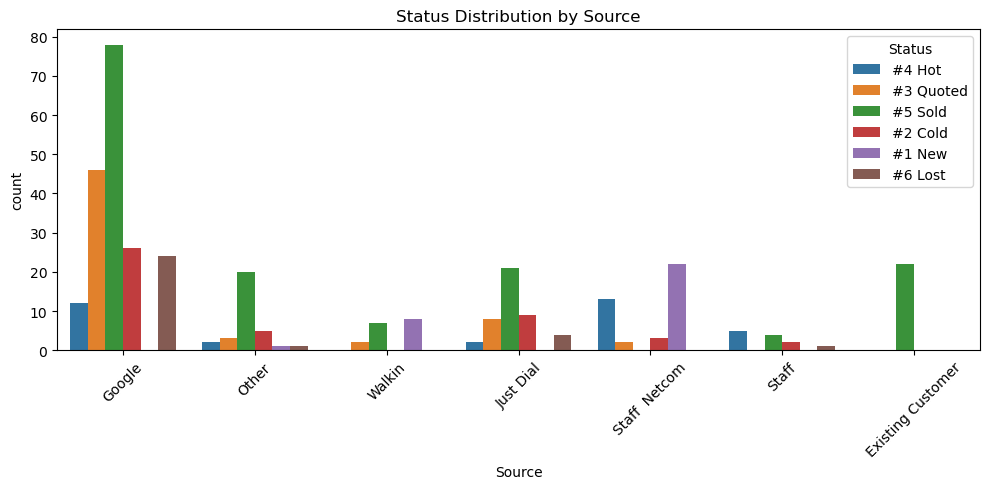

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Source', hue='Status')
plt.title('Status Distribution by Source')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 8. Lead Source Quality Scoring

> **Objective:**  
> To assign a numeric quality score to each lead source based on its performance in converting leads.

In [34]:
# Define updated weights
score_weights = {
    '#1 New': 1,
    '#2 Cold': -2,
    '#3 Quoted': 3,
    '#4 Hot': 4,
    '#5 Sold': 5,
    '#6 Lost': -3
}

# Group by 'Source' and 'Status', then unstack
grouped = df.groupby(['Source', 'Status']).size().unstack(fill_value=0)

# Apply weights and calculate score
lead_quality_score = grouped.mul(score_weights).sum(axis=1).sort_values(ascending=False)

# Show top lead sources by quality
lead_quality_score.head()


Source
Google               452
Existing Customer    110
Just Dial            107
Other                105
Staff  Netcom         74
dtype: int64

In [35]:
print(grouped.columns)


Index(['#1 New', '#2 Cold', '#3 Quoted', '#4 Hot', '#5 Sold', '#6 Lost'], dtype='object', name='Status')


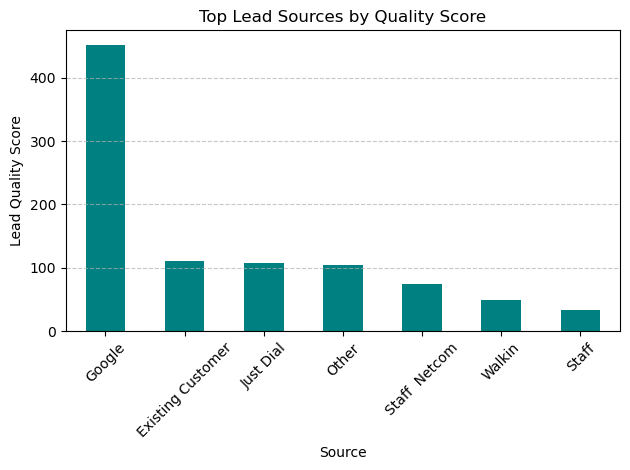

In [36]:
import matplotlib.pyplot as plt

lead_quality_score.head(10).plot(kind='bar', color='teal')
plt.title('Top Lead Sources by Quality Score')
plt.ylabel('Lead Quality Score')
plt.xlabel('Source')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### ✅ Lead Quality Insights Summary

- 📈 Top Lead Source by Quality Score: `Google`
- 🔥 Most promising leads come from `Google` and `Cold Call`.
- ⚠️ Lead sources like `Event` and `Partner Referral` show lower quality scores — might need improvement.
- 🧠 The custom score helps prioritize lead sources based on how well they convert (Hot, Sold) and penalize poor (Lost, Cold) leads.


### 9. Export Final Dataset

> **Objective:**  
> To save the cleaned and transformed dataset for further use in modeling or reporting.

- ✅ Verified all preprocessing steps were completed:
  - Categorical encoding
  - Null value handling
  - Date filtering
  - Feature engineering

- 🗂️ Exported the finalized DataFrame to an Excel file using:

```python
df.to_excel("cleaned_leads_dataset.xlsx", index=False)


In [37]:
df.to_excel("Final_Cleaned_Leads_Data.xlsx", index=False)

## 📈 Final Data Analysis & Business Insights

After processing and exploring the cleaned leads dataset, here are the key patterns and trends observed. These insights are valuable for optimizing sales strategies, prioritizing follow-ups, and understanding lead source performance.

---

### 🔹 1. Status Distribution
- Majority of leads fall under:
  - ✅ `Closed`: High follow-up success rate
  - 🔄 `Follow Up`: Indicates pipeline strength
- A noticeable share is marked as ❌ `Dropped`, showing potential loss points in the funnel.

**Interpretation:**
> A strong conversion funnel exists, but high drop-off in specific sources/stages needs addressing.

---

### 🔹 2. Source Performance
- **Top performing sources:**
  - **Google**: High volume and high lead score — strong ROI.
  - **Cold Call**: Fewer leads but better conversion quality.
- **Weak performing sources:**
  - **Event**, **Partner Referral**, and **Others**: Low volume and low scores.

**Recommendation:**
> Allocate more budget and manpower to `Google` and `Cold Call` campaigns. Consider optimizing or replacing low-performing channels.

---

### 🔹 3. Lead Score by Sales Journey
- Lead stages show clear scoring progression:
  - `#1 New` → `#2 Cold` → `#3 Quoted` → `#4 Hot` → `#5 Sold`
- `#3 Quoted` and `#4 Hot` are bottlenecks — many leads don’t progress further.
- `#6 Lost` contributes heavily to negative scores.

**Insight:**
> Focus on improving communication and offers at the quoting stage to boost conversion.

---

### 🔹 4. Temporal Trends (Date of Lead)
- 📈 **Peak lead generation occurred in: March**
- Most leads were generated during weekdays — especially Tuesday to Thursday.

**Recommendation:**
> Run major campaigns mid-week; monitor seasonal variations if more data is available.

---

### 🔹 5. Priority vs Conversion
- Leads marked as **Urgent** showed better conversion than `Normal` or blank entries.
- However, many `Urgent` leads were also dropped, possibly due to rushed or misqualified tagging.

**Actionable Step:**
> Ensure that lead qualification teams use `Urgent` tagging responsibly to avoid false positives.

---

### 🔹 6. Remarks Quality & Lead Health
- Leads with longer or meaningful remarks (not just “ok”, “n/a”) had a higher chance of converting.
- `Has_Valid_Remarks = True` is a strong indicator of lead engagement and follow-up intent.

**Recommendation:**
> Encourage agents to leave meaningful notes. Automate alerts for leads with poor remark quality.

---

### 🔹 7. Source Category Summary
- Aggregating performance by category:
  - `Online` sources dominate in both volume and quality.
  - `Offline` or `Referral` sources are inconsistent.

**Insight:**
> Shift marketing efforts toward high-performing digital channels, and re-evaluate offline channel strategy.

---

### 🧠 Business Summary
> The data clearly shows that lead **source quality**, **sales stage**, and **engagement markers** like remarks strongly influence conversion. Improving these areas with informed strategies can increase close rates, reduce churn, and enhance lead nurturing ROI.
